# Exercise 2
Repeat Exercise 1 for your own project and data

### Qa)
Plot the distribution Cat_00. Also, find the spread, average and median.



In [1]:
import sys,os
sys.path.append(os.path.expanduser('./ProjectFunctions'))
from ProjectFunctions import LoadFunc as Func

Cat0 = Func.getSet00()
Cat1 = Func.getSet01()
# Cat2 = Func.getSet02()
# Cat3 = Func.getSet03()
# Cat4 = Func.getSet04()
# Cat5 = Func.getSet05()
# Cat6 = Func.getSet06()

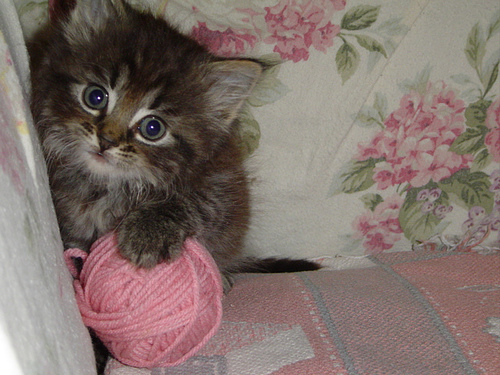

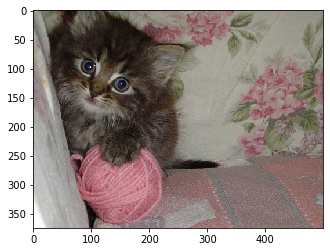

In [2]:
import pylab as pult
from PIL import Image
import cv2

#Methods of displaying

pult.imshow(Cat0[1])

im = Image.fromarray(Cat0[1])
display(im)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

m1 = []
s1 = []
v1 = []
med1 = []

for x in range(len(Cat0)):
    m1.append(np.mean(Cat0[x]))
    s1.append(np.std(Cat0[x]))
    v1.append(np.var(Cat0[x]))
    med1.append(np.median(Cat0[x]))
    
    
    
# Uncomment below, to see Mean, Standardard Deviation, Variation and Median of each picture in Cat0 Dataset
    
print('Average of Cat0 = ', m1)
# print('Standard Deviation of Cat0 = ', s1)
# print('Variation of Cat0 =', v1)
print('Median of Cat0 = ', med1)

Average of Cat0 =  [104.3278951111111, 115.05933866666666, 121.76585244444445, 154.947248, 100.39576976976977, 100.2165980252692, 62.86785555225653, 78.9785831111111, 141.04076876876877, 169.49047247247248, 107.78501797385621, 122.62037319607205, 113.95735820064665, 48.62708088888889, 73.24403555555556, 87.89993955555556, 79.02791111111111, 112.88484022038567, 170.7270436483881, 59.37617701129184, 132.05791651059502, 143.65868622222223, 106.63125155555555, 115.2925786163522, 137.64463187195545, 91.14342222222223, 85.5118, 102.13770942947491, 105.1254094432699, 110.01404166666667, 85.71653050052498, 133.4456590221774, 65.2051623949981, 145.0706876118978, 95.82143743743744, 78.15398142414861, 119.31135516696506, 90.78107174993899, 154.07631887335526, 128.7337511111111, 57.86604, 104.6218365684655, 33.77361256544503, 108.41509310649936, 151.11177647058824, 128.64022418879057, 93.07426010715506, 79.22996166666667, 155.74590833333335, 106.03339470757379, 147.061904, 70.90095238095238, 119.9

### Qb)
Is there a difference in median and mean in Cat0?
Which of these two describes the the Cat0 the best?


Average in this case would describe the images of cats best. The Median takes the middle colour value of image, while the mean takes the average. The mean would somewhat describe colour distribution and brightness. The problem then lies in that the dataset can have a group of highs and lows and the mean would average it out, which means it would be affected highly by outliers.  The median is better suited for skewed data, which images tends to be. The colour distribution of each pixel is not to predict so it would be more sensible to derive from the middle value of data.

### Qc)
Fit a normal distribution of the data and plot a histogram - does the two fit?


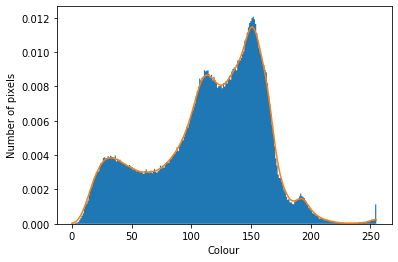

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#density line
density = stats.gaussian_kde(Cat0[1].flatten())

samples, histo, _ = plt.hist(Cat0[1].flatten(), bins=256, histtype='stepfilled', density=True)
plt.plot(histo, density(histo))
plt.xlabel('Colour')
plt.ylabel('Number of pixels')
plt.show()

The histogram does somewhat fit a normal distribution. It can be seen around the 150 colour mark, that the distribution of colours can be seen a bit like a normal distribution.

### Qd)
Is there a link between Cat0[1] and Cat0[2]? Make correlation plot



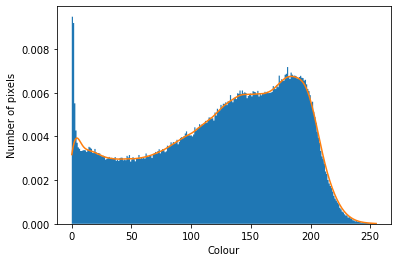

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


#A histogram of image Cat0[2] is shown to, review the colour distribution
#density line
density = stats.gaussian_kde(Cat0[2].flatten())

samples, histo, _ = plt.hist(Cat0[2].flatten(), bins=256, histtype='stepfilled', density=True)
plt.plot(histo, density(histo))
plt.xlabel('Colour')
plt.ylabel('Number of pixels')
plt.show()

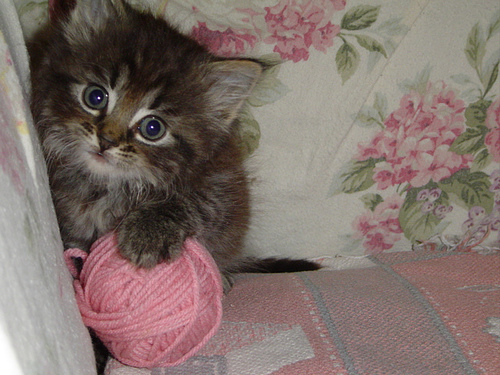

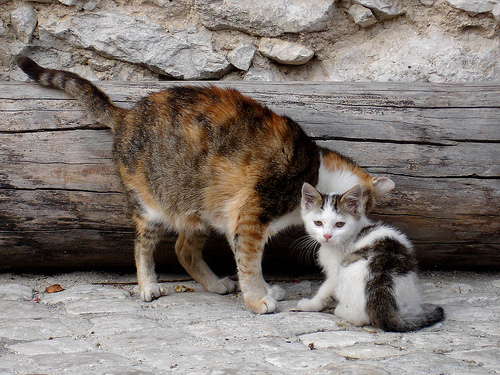

In [6]:
#human evaluation of images

im = Image.fromarray(Cat0[1])
display(im)


im = Image.fromarray(Cat0[2])
display(im)

Text(0, 0.5, 'Cat1[2]')

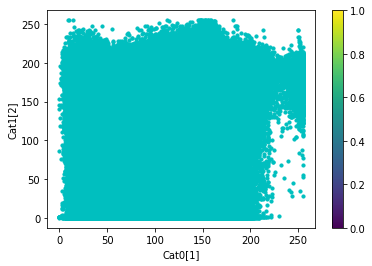

In [40]:
#plotting the scatter plot

plt.figure()
plt.scatter(Cat0[1], Cat0[2], s=10, c="c", cmap="paired")
plt.colorbar()

plt.xlabel('Cat0[1]')
plt.ylabel('Cat1[2]')

Comparing both histograms from earlier with this scatterplot, it can be seen that Pic1 has way less black spots while still having more lighter spots. This can be seen on the scatter plot. Thought, it can still be seen there are many reoccuring colours.

### Qe)
What is the 5% and 95% percentages of median_house_value? (i.e. the limits for 5% lowest and highest). Also, plot the distribution of median_house_value.
Comment on the realism of the max-value and 95% percentile - suggest a solution for this issue, if more realistic data was desired





In [8]:
MeanCat = np.mean(Cat0[1])
SDCat = np.std(Cat0[1])
MedCat = np.median(Cat0[1])

print('The Average of Cat0[1] = ', MeanCat)
print('\nThe standard deviation of Cat0[1] = ', SDCat)
print('\nThe median of Cat0[1] = ',MedCat)

The Average of Cat0[1] =  115.05933866666666

The standard deviation of Cat0[1] =  45.63706687223025

The median of Cat0[1] =  123.0


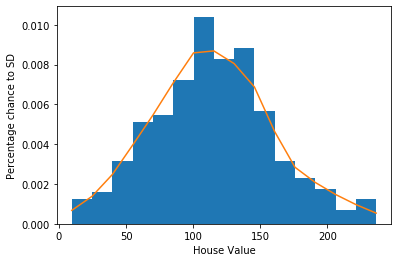

In [9]:
Distribution = np.random.normal(MeanCat, SDCat, len(Cat0[1]))
#density line
density = stats.gaussian_kde(Distribution)


samples, histo, _ = plt.hist(Distribution, bins='fd', density=True)

plt.plot(histo, density(histo))
plt.xlabel('House Value')
plt.ylabel('Percentage chance to SD')
plt.show()

In [10]:
Percent95 = np.percentile(histo, 95)
print(Percent95)
Percent5 = np.percentile(histo, 5)
print(Percent5)


225.0050606959763
20.89152051245244
